In [2]:
import mne

# The .vhdr file contains the metadata, so you only need to specify this file
file_path = r'D:\Anesthesia_Research_Fellow\CA-01\CA-01.vhdr'  # Update with the path to your .vhdr file

# Load the data
raw = mne.io.read_raw_brainvision(file_path, preload=True)

# Now the 'raw' object contains your EEG data
print(raw.info)  # This will give you details about the data

Extracting parameters from D:\Anesthesia_Research_Fellow\CA-01\CA-01.vhdr...
Setting channel info structure...
Reading 0 ... 10477790  =      0.000 ... 20955.580 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F5, AFz, F6, Fz, T7, C3, Cz, C4, T8, P5, Pz, P6, O1, ...
 chs: 16 EEG, 5 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>


##### Montages to calcualte the electrode locations for topography analyses 

In [ ]:
mne.channels.data.montages 

In [38]:
# Load standard montage from MNE
montage_name = 'standard_1020'  # You can replace this with your montage of interest (e.g., 'standard_1005', '10-20')
montage = mne.channels.make_standard_montage(montage_name)

# You can now access the positions of electrodes
print("Positions of the electrodes:")
print(montage.get_positions()['ch_pos'])

# If you want the montage applied to EEG data you've loaded:
raw.set_montage(montage)

# Now electrode positions are set in the info of `raw`
# You can access these electrode positions using:
if 'raw' in locals():  # Checks if `raw` has been loaded and defined
    print("Positions from the raw data:")
    print(raw.info['chs'])



Positions of the electrodes:
OrderedDict({'Fp1': array([-0.0294367,  0.0839171, -0.00699  ]), 'Fpz': array([ 0.0001123,  0.088247 , -0.001713 ]), 'Fp2': array([ 0.0298723,  0.0848959, -0.00708  ]), 'AF9': array([-0.0489708,  0.0640872, -0.047683 ]), 'AF7': array([-0.0548397,  0.0685722, -0.01059  ]), 'AF5': array([-0.0454307,  0.0728622,  0.005978 ]), 'AF3': array([-0.0337007,  0.0768371,  0.021227 ]), 'AF1': array([-0.0184717,  0.0799041,  0.032752 ]), 'AFz': array([0.0002313, 0.080771 , 0.035417 ]), 'AF2': array([0.0198203, 0.0803019, 0.032764 ]), 'AF4': array([0.0357123, 0.0777259, 0.021956 ]), 'AF6': array([0.0465843, 0.0738078, 0.006034 ]), 'AF8': array([ 0.0557433,  0.0696568, -0.010755 ]), 'AF10': array([ 0.0504352,  0.0638698, -0.048005 ]), 'F9': array([-0.0701019,  0.0416523, -0.049952 ]), 'F7': array([-0.0702629,  0.0424743, -0.01142  ]), 'F5': array([-0.0644658,  0.0480353,  0.016921 ]), 'F3': array([-0.0502438,  0.0531112,  0.042192 ]), 'F1': array([-0.0274958,  0.0569311, 

In [40]:
import numpy as np
import matplotlib.pyplot as plt

sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 50])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 3
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-0.01368107, -0.01368131, -0.01368252, ..., -0.01454998,
        -0.01455398, -0.01455519]]), array([11.   , 11.002, 11.004, ..., 49.994, 49.996, 49.998]))


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\Kourosh\AppData\Local\Temp\ipykernel_19576\1273200865.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


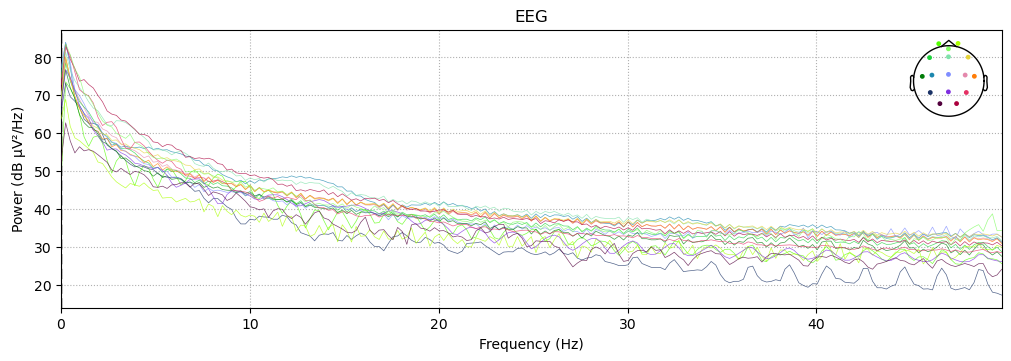

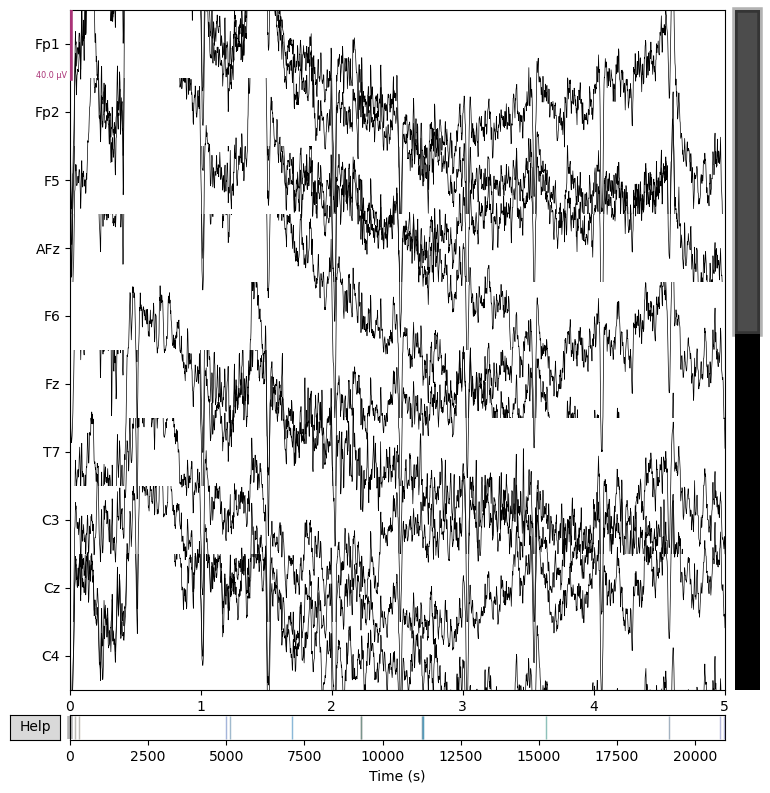

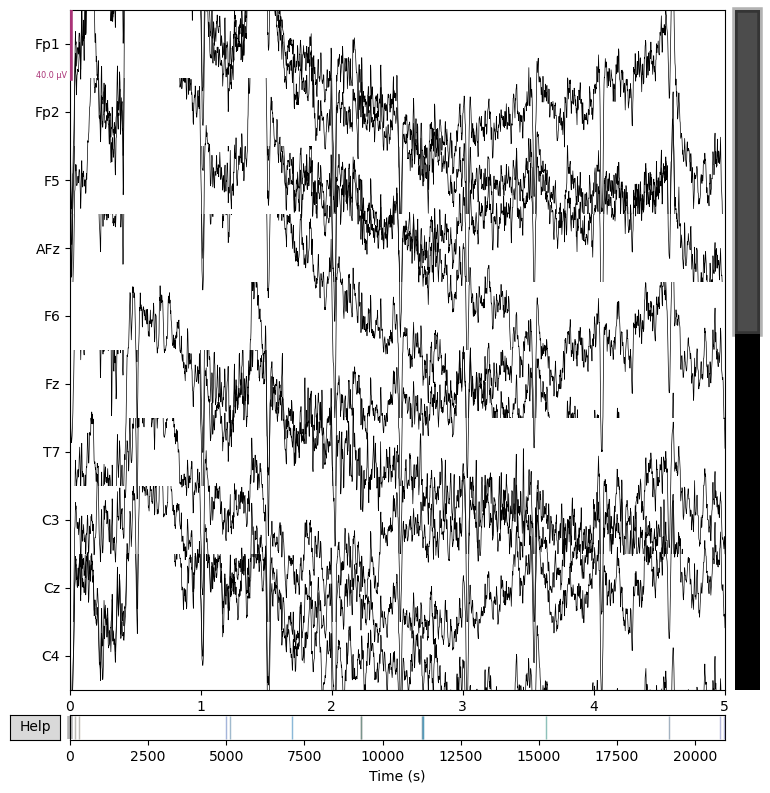

In [41]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=10)

##### Extract epochs

In [42]:
import sklearn

ica = mne.preprocessing.ICA(n_components=10, random_state=97, max_iter=800)
ica.fit(raw)
# ica.exclude = [1,2]
# ica.plot_properties(raw, picks = ica.exclude)

Fitting ICA to data using 16 channels (please be patient, this may take a while)


C:\Users\Kourosh\AppData\Local\Temp\ipykernel_19576\492879704.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 10 components
Fitting ICA took 315.1s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,29 iterations on raw data (10477791 samples)
ICA components,10
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
10477 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10477 matching events found
No baseline correction applied
0 projection items activated


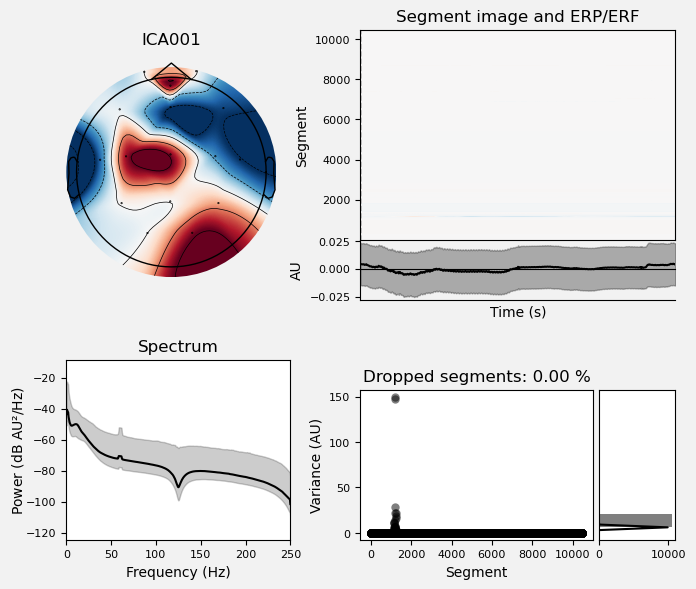

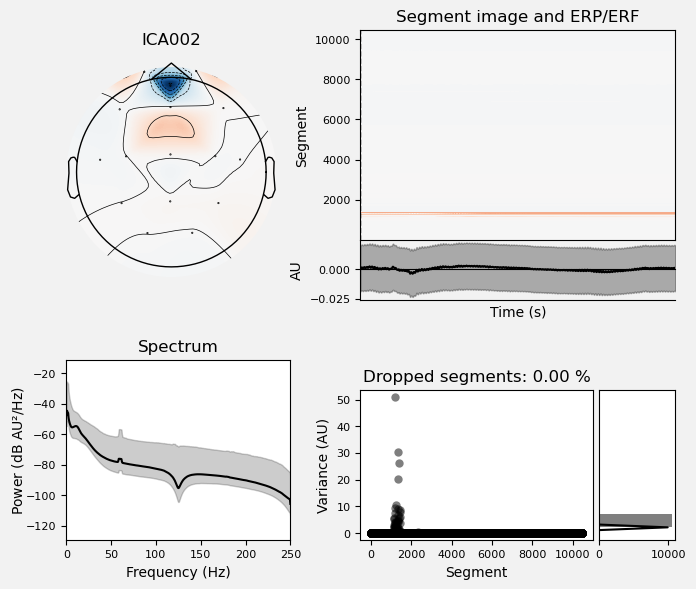

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [43]:
ica.exclude = [1,2]
ica.plot_properties(raw, picks = ica.exclude)

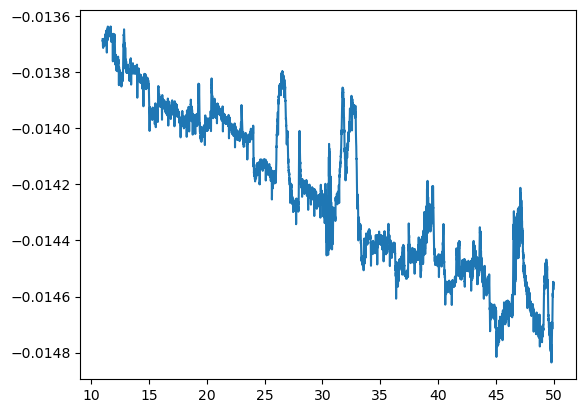

In [6]:
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x,y)
# plt.ylim([-.01,.01])

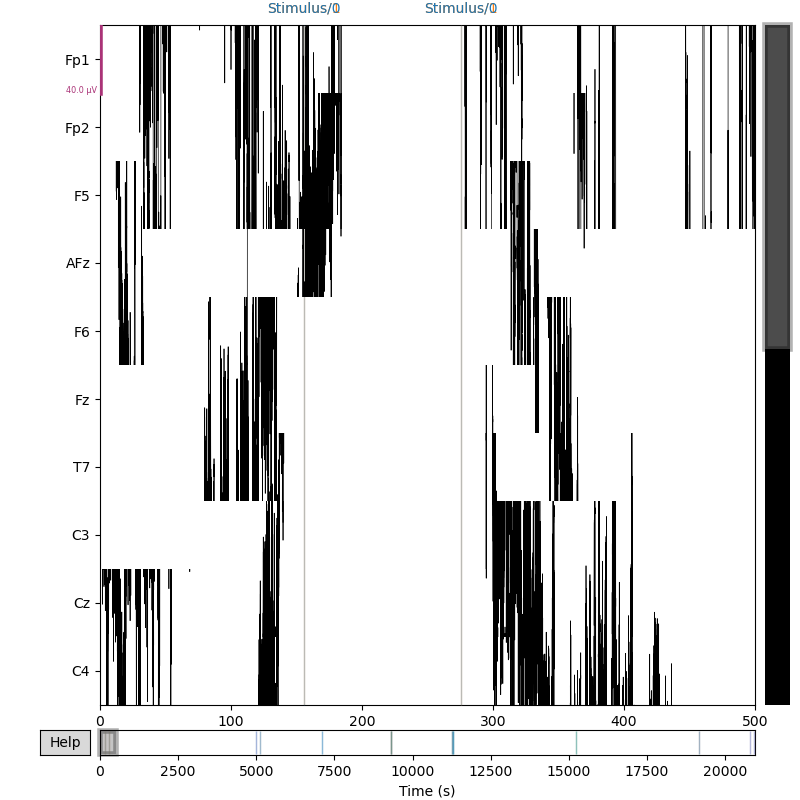

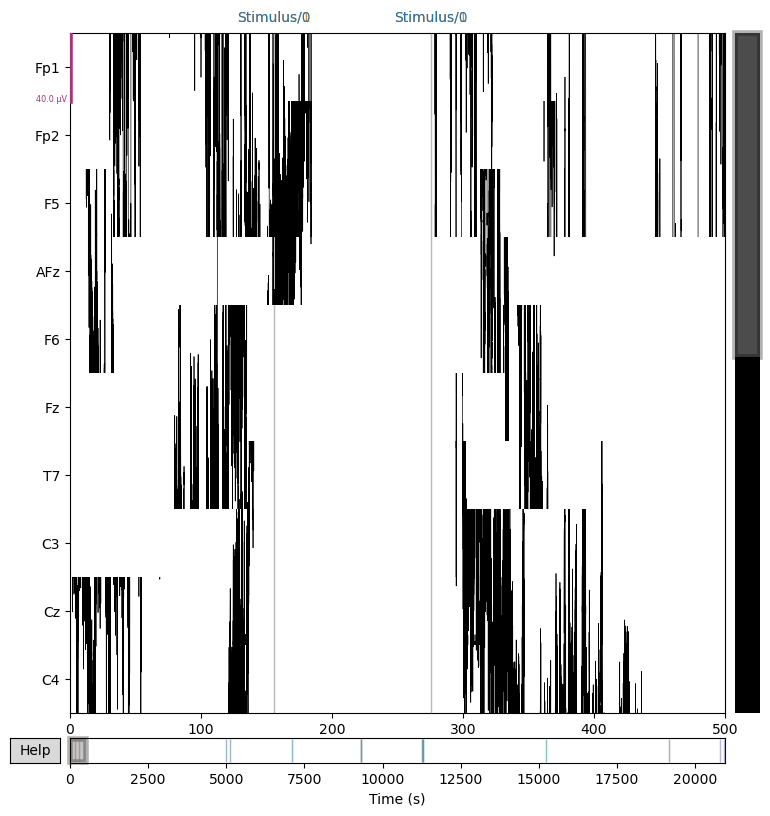

In [21]:
import ipywidgets as widgets
%matplotlib widget
raw.plot(n_channels = 10, duration = 500) # , duration = 50

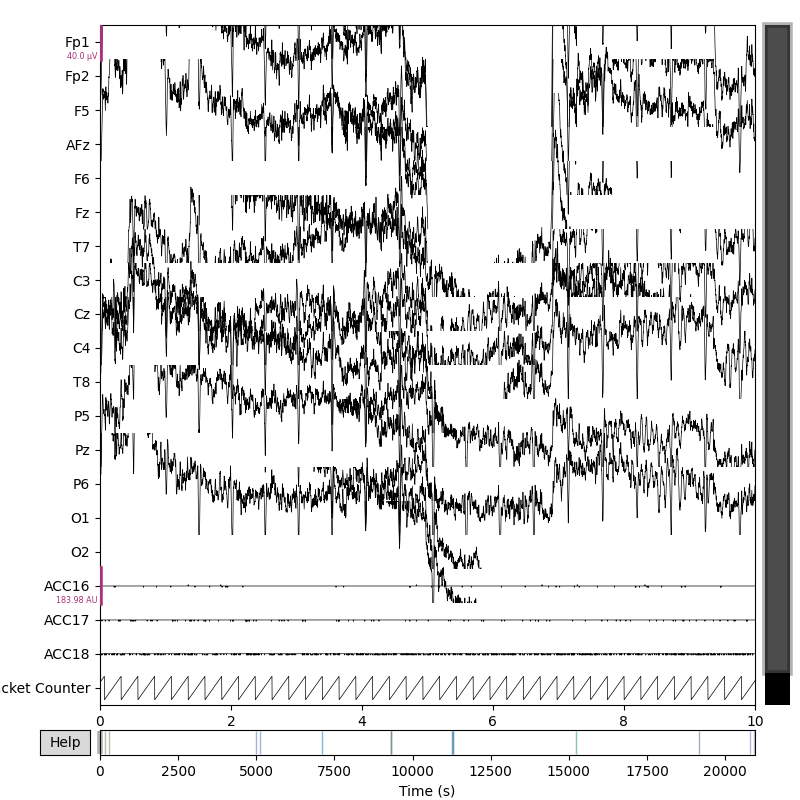

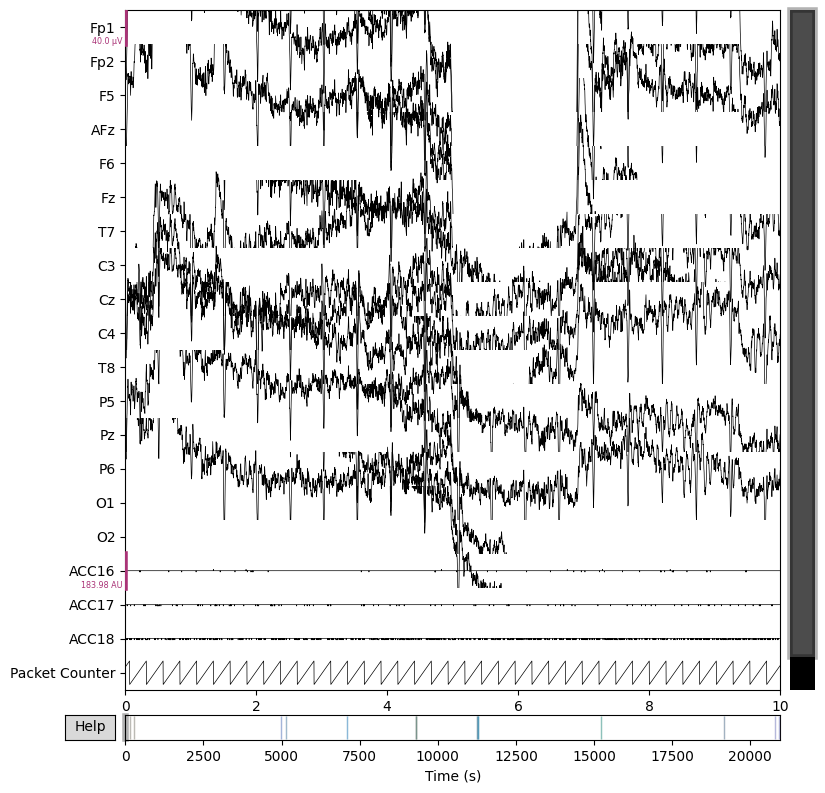

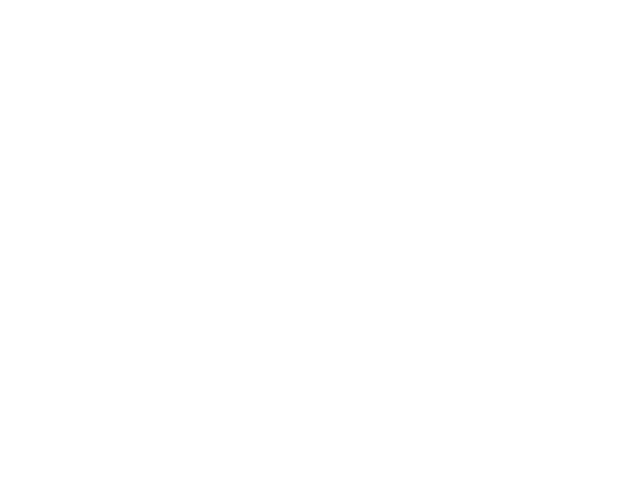

In [23]:
plt.figure()
mne.viz.plot_raw(raw)

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\Kourosh\AppData\Local\Temp\ipykernel_42656\1555844034.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks = 'data', exclude='bads', amplitude=False)
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


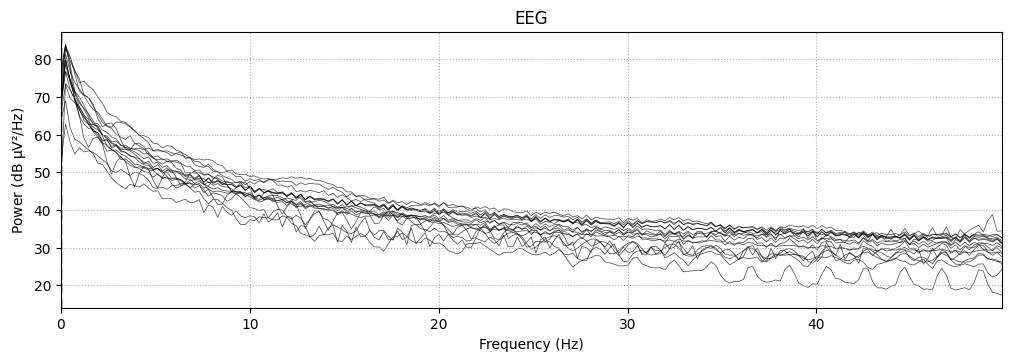

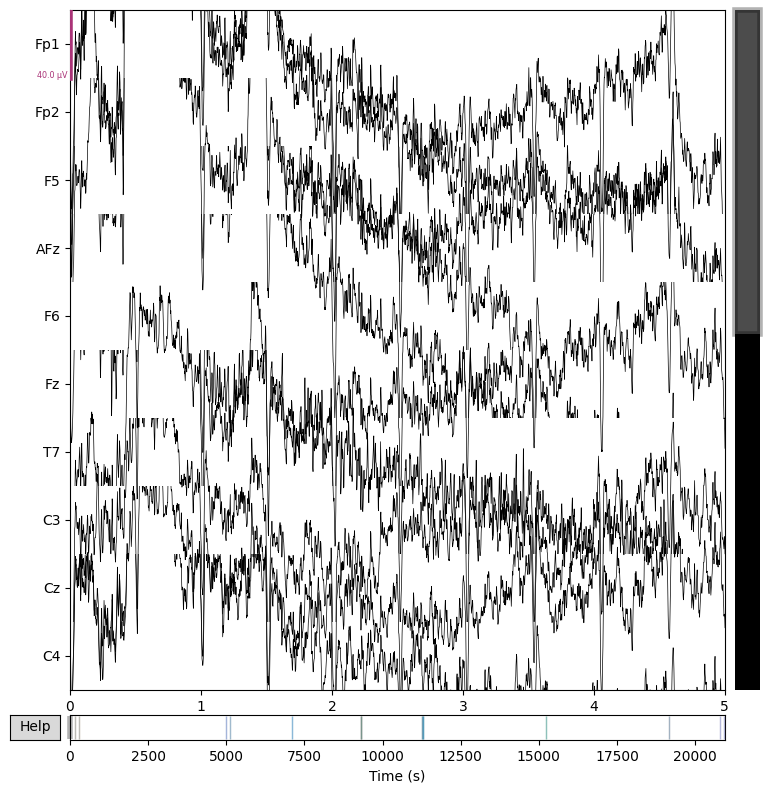

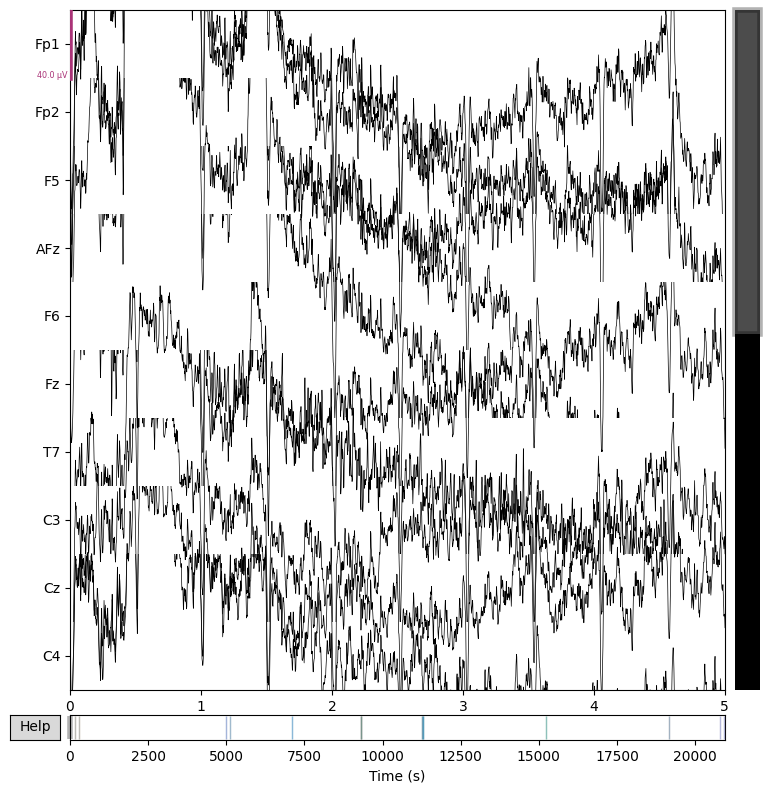

In [9]:
raw.compute_psd(fmax=50).plot(picks = 'data', exclude='bads', amplitude=False)
raw.plot(duration = 5, n_channels=10)

In [10]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


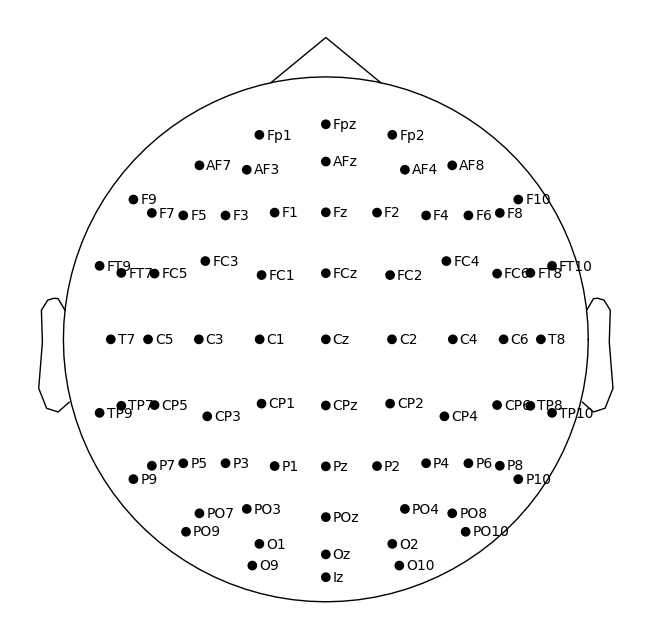

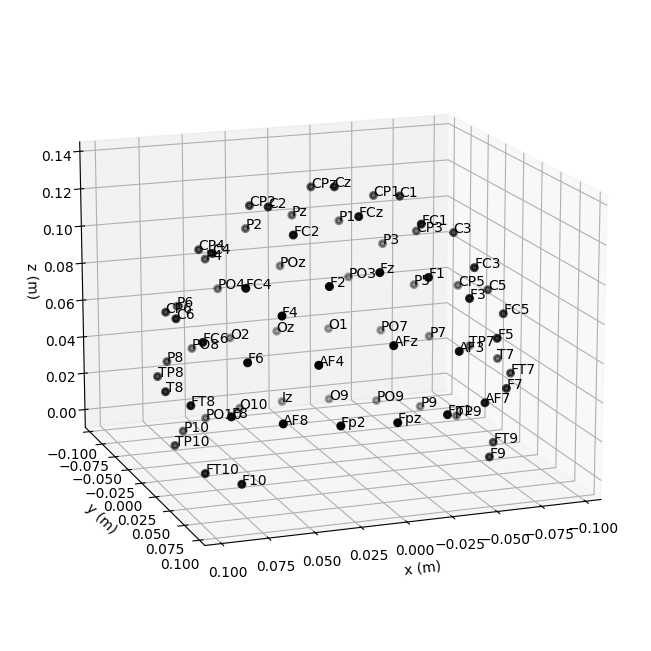

In [12]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
print(easycap_montage)

easycap_montage.plot()  # 2D
fig = easycap_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial